Inspired by https://martin-thoma.com/python-markov-chain-packages/

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(''), '..'))

import yaml
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
import numpy as np
import os


start_year = 2000
num_years = 40
end_year = start_year + num_years

# list out the seperators for the markov chain, with variable name, 
# pretty name for printing, and tags
ys = """
- level:
    - name: hc3 
      pretty_name: Health Center III
    - name: hc4
      pretty_name: Health Center IV
    - name: dhosp
      pretty_name: District Hospital
    - name: rrh
      pretty_name: Regional Referral Hospital
    - name: nrh
      pretty_name: National Referral Hospital
    - name: school
      pretty_name: Training School
- location:
    - name: rural 
      pretty_name: Rural
    - name: urban
      pretty_name: Urban
- position:
    - name: ss_student
      pretty_name: Secondary school student
    - name: ao_student 
      pretty_name: AO student
      tags: ['student']
    - name: md_student 
      pretty_name: MBChB student
      tags: ['student']
    - name: ao 
      pretty_name: Anesthetic officer
    - name: mda 
      pretty_name: Physician anesthesthetist
"""


# Reformat as 1 dimentional list - allows blanks
y = yaml.load(ys)
seperators = []
state_id = 0
for si, x in enumerate(y):
    s = x.keys()[0]
    # add to array
    for t in x[s]:
        t['seperator_name'] = s
        t['seperator_id'] = si
        t['state_id'] = state_id
        seperators.append(t)



# load into a database
markov_seps = pd.DataFrame(seperators)
num_seps = len(markov_seps)
# sort by 'seperator_id' to preserve hiearchy
markov_seps = markov_seps.sort_values('seperator_id', ascending=False).reset_index(drop=True)
# make an x by y array where x=number of seperators
iterables = [gb.values.tolist() for k, gb in 
             markov_seps.groupby('seperator_name',
                                 sort=False).name]
# get number of states
num_states = np.prod([len(gb.values.flatten()) for k, gb in markov_seps.groupby('seperator_name').name])
# add id for states
# iterables = iterables + [range(num_states)]
# create names for colums
col_names = markov_seps.seperator_name.unique().tolist()
col_names = col_names # + ['ss_student', 'ao_student']

# interables2 = list(itertools.product(*iterables)) + [ ('ss_student','',''), ('ao_student','','') ]

# create multiindex ...

columns = pd.MultiIndex.from_product(iterables, names=col_names)
# ... to make initial blank df
init = pd.DataFrame(np.zeros((1, len(columns))), columns=columns)

# indexing examples 
# idf.hc3.rural.ao

init.head(1)


position ss_student                                                    ...    \
location      rural                             urban                  ...     
level           hc3  hc4 dhosp  rrh  nrh school   hc3  hc4 dhosp  rrh  ...     
0               0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  ...     

position   mda                                                     
location rural                  urban                              
level    dhosp  rrh  nrh school   hc3  hc4 dhosp  rrh  nrh school  
0          0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0    0.0  

[1 rows x 60 columns]

In [2]:
# Blank transitions matrix
# iterables_for_trans = iterables
# col_names_for_trans = col_names
# columns_for_trans = pd.MultiIndex.from_product(iterables_for_trans, names=col_names_for_trans)
trans = pd.DataFrame(np.zeros((num_states,num_states)), index=columns, columns=columns)

# display first 5 of columns, first 5 of index
trans[trans.columns[:20]].loc[trans.index[:20]]

position                   ss_student                                         \
location                        rural                             urban        
level                             hc3  hc4 dhosp  rrh  nrh school   hc3  hc4   
position   location level                                                      
ss_student rural    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
           urban    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
ao_student rural    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
           urban    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   

position                                          ao_student                  \
location                                               rural                   
level                      dhosp  rrh  nrh school        hc3  hc4 dhosp  rrh   
position   location level                                                      
ss_student rural    hc3      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    hc4      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    dhosp    0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    rrh      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    nrh      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    school   0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
           urban    hc3      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    hc4      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    dhosp    0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    rrh      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    nrh      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    school   0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
ao_student rural    hc3      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    hc4      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    dhosp    0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    rrh      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    nrh      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    school   0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
           urban    hc3      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   
                    hc4      0.0  0.0  0.0    0.0        0.0  0.0   0.0  0.0   

position                                           
location                               urban       
level                       nrh school   hc3  hc4  
po

In [3]:
init = init.T
init.axes[0].name = 'from'
init.columns = ['initial_population']
init[:20]

initial_population
position   location level                     
ss_student rural    hc3                    0.0
                    hc4                    0.0
                    dhosp                  0.0
                    rrh                    0.0
                    nrh                    0.0
                    school                 0.0
           urban    hc3                    0.0
                    hc4                    0.0
                    dhosp                  0.0
                    rrh                    0.0
                    nrh                    0.0
                    school                 0.0
ao_student rural    hc3                    0.0
                    hc4                    0.0
                    dhosp                  0.0
                    rrh                    0.0
                    nrh                    0.0
                    school                 0.0
           urban    hc3                    0.0
                    hc4                    0.0

In [4]:

# example values into the initial df
num_mda_total = 42
num_ao_total = 400
prop_ao_rural = 0.3
prop_mda_rural = 0.1


# Set AOs at all facilities
init.loc["ao","urban",["hc4","hc3","dhosp","rrh"]] = 100
init.loc["ao_student","urban", "school"] = 100
init.loc["mda","urban","nrh"] = 30
init.loc["mda","urban","rrh"] = 15
init.loc["md_student","urban","school"] = 40

# Make a bunch of high school students to add into model
ss_students = 1000000000
init.loc["ss_student","urban","school"] = ss_students

init.tail(20)

initial_population
position location level                     
ao       rural    nrh                    0.0
                  school                 0.0
         urban    hc3                  100.0
                  hc4                  100.0
                  dhosp                100.0
                  rrh                  100.0
                  nrh                    0.0
                  school                 0.0
mda      rural    hc3                    0.0
                  hc4                    0.0
                  dhosp                  0.0
                  rrh                    0.0
                  nrh                    0.0
                  school                 0.0
         urban    hc3                    0.0
                  hc4                    0.0
                  dhosp                  0.0
                  rrh                   15.0
                  nrh                   30.0
                  school                 0.0

In [5]:
init[init.initial_population>0]

initial_population
position   location level                     
ss_student urban    school        1.000000e+09
ao_student urban    school        1.000000e+02
md_student urban    school        4.000000e+01
ao         urban    hc3           1.000000e+02
                    hc4           1.000000e+02
                    dhosp         1.000000e+02
                    rrh           1.000000e+02
mda        urban    rrh           1.500000e+01
                    nrh           3.000000e+01

In [6]:
# sort for performance
# trans = trans.sort_index(level=2, axis=0)
# trans = trans.sort_index(level=2, axis=1)

# define transitions
trans.axes[0].name = 'from'
trans.axes[1].name = 'to'

# the vertical index is "from", horizontal (columsn) is "to"
# the syntax here is confusing:
# tuple method....
# .loc[(y),(x)] is where (y) = indexing of rows, (x) indexing of columns, ie
# trans.loc[('ao_student','rural','rrh'),('ao_student','rural','dhosp')]
# or 
# dfmi.loc[idx[:, :, ['C1', 'C3']], idx[:, 'foo']]
# or specific axis
# dfmi.loc(axis=0)[:, :, ['C1', 'C3']]

# This method works for viewing but not setting data: 
# trans.loc['ao_student',:,'dhosp']['ao_student','rural', 'dhosp']

# Fill AO students and MD student from secondary school
trans.loc[('ss_student','urban','school'),('ao_student', 'urban', 'school')] = 30.0/ss_students
trans.loc[('ss_student','urban','school'),('md_student', 'urban', 'school')] = 100.0/ss_students

# 33% of AO students graduate every year and become AOs - we'll dist them
trans.loc[('ao_student','urban','school'),('ao', 'urban', 'dhosp')] = .11
trans.loc[('ao_student','urban','school'),('ao', 'urban', 'hc3')] = .11
trans.loc[('ao_student','urban','school'),('ao', 'urban', 'hc4')] = .11

# 20% of MD students graduate every year and (pretend) become Mmeds instantly
trans.loc[('md_student','urban','school'),('mda', 'urban', 'rrh')] = .05
trans.loc[('md_student','urban','school'),('mda', 'urban', 'nrh')] = .15

# Fill in recursive TPs
for ituple in trans.index:
    # ituple ~= ('ao','rural',....)
    sum_of_leavers = trans.loc(axis=0)[ituple].sum()
    remainers = 1.0 - sum_of_leavers
    trans.loc[ituple, ituple] = remainers

# Display all trans
trans


/Users/alexgoodell/.virtualenvs/uganda/lib/python2.7/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


position                   ss_student                                         \
location                        rural                             urban        
level                             hc3  hc4 dhosp  rrh  nrh school   hc3  hc4   
position   location level                                                      
ss_student rural    hc3           1.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  1.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   1.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  1.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  1.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    1.0   0.0  0.0   
           urban    hc3           0.0  0.0   0.0  0.0  0.0    0.0   1.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  1.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
ao_student rural    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
           urban    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
md_student rural    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
           urban    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
ao         rural    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    nrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    school        0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
           urban    hc3           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    hc4           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    dhosp         0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   
                    rrh           0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0   


In [8]:

init_m = np.matrix(init['initial_population'].values)
trans_m_pre = np.matrix(trans.values)
trans_m_post = np.matrix(trans.values)

results_data = []
for step in range(num_years):
    if step == 0:
        result = init_m
        current_m = init_m
    else:
        current_m = current_m * trans_m_pre
        result = current_m
    results_data.append(np.array(result).flatten())
    
results = pd.DataFrame(results_data, columns=columns, index=range(start_year,end_year))
results.index.name = "year"

# Display all results with non-zero values
results[results.any(axis=1)].T[results[results.any(axis=1)].any(axis=0)].T.head(10)

position    ss_student  ao_student  md_student          ao              \
location         urban       urban       urban       urban               
level           school      school      school         hc3         hc4   
year                                                                     
2000      1.000000e+09  100.000000   40.000000  100.000000  100.000000   
2001      9.999999e+08   97.000000  132.000000  111.000000  111.000000   
2002      9.999997e+08   94.989996  205.599987  121.670000  121.670000   
2003      9.999996e+08   93.643290  264.479964  132.118900  132.118900   
2004      9.999995e+08   92.740992  311.583932  142.419661  142.419661   
2005      9.999994e+08   92.136449  349.267094  152.621171  152.621171   
2006      9.999992e+08   91.731402  379.413610  162.756180  162.756180   
2007      9.999991e+08   91.460016  403.530810  172.846634  172.846634   
2008      9.999990e+08   91.278183  422.824557  182.907236  182.907236   
2009      9.999988e+08   91.156352  438.259541  192.947836  192.947836   

position                            mda              
location                          urban              
level          dhosp    rrh         rrh         nrh  
year                                                 
2000      100.000000  100.0   15.000000   30.000000  
2001      111.000000  100.0   17.000000   36.000000  
2002      121.670000  100.0   23.600000   55.800000  
2003      132.118900  100.0   33.879999   86.639998  
2004      142.419661  100.0   47.103998  126.311993  
2005      152.621171  100.0   62.683194  173.049582  
2006      162.756180  100.0   80.146549  225.439646  
2007      172.846634  100.0   99.117229  282.351688  
2008      182.907236  100.0  119.293770  342.881309  
2009      192.947836  100.0  140.434998  406.304993

/Users/alexgoodell/.virtualenvs/uganda/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


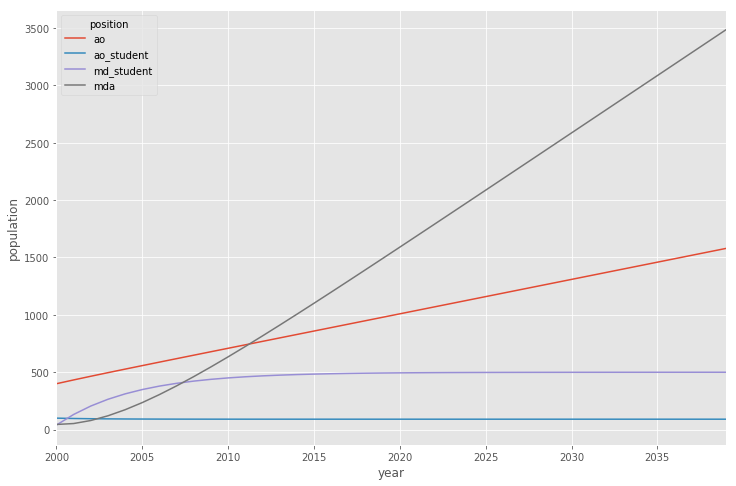

In [9]:
%matplotlib inline
plt.figure(figsize=(12, 8))

long_results = pd.DataFrame()
long_results["population"] = results.stack(level=range(3)) # TODO replace with number of seperators
long_results["run"] = 1

g = long_results.sum(level=['year','position']).reset_index()
g = g[g.position != 'ss_student']
# Create the plot
ax = sns.tsplot(time="year", value="population", condition="position", unit="run", data=g)